In [1]:
import antiCPy
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
from antiCPy.trend_extrapolation.cp_segment_fit import CPSegmentFit

In [3]:
# get a time series
np.random.seed(1234)
Q = 0.25 # noise variance
y1 = np.arange(0,1,0.02) + np.random.normal(0,Q,50)
y2 = 1-np.arange(0,1,0.02) + np.random.normal(0,Q,50)
y = np.concatenate((y1,y2))
x = np.arange(len(y))-20

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

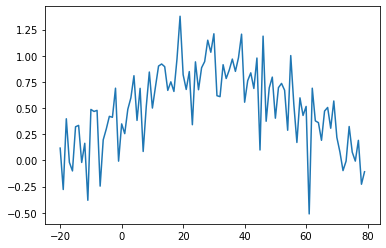

In [4]:
plt.plot(x,y)
plt.scatter

In [5]:
Fit = CPSegmentFit(x_data = x,
             y_data = y,
             number_expected_changepoints = 1,
             num_MC_cp_samples = 1000000,
                   z_array_size = 100)

number of MC cp samples before exact correction:  1000000
number of MC cp samples:  98


In [6]:
print(Fit.num_of_cp_configs)

98


In [35]:
print(1)
Fit.initialize_MC_cp_configurations(print_sum_control = True)
print(2)
Fit.initialize_A_matrices()
try:
    print("Q")
    Fit.Q_matrix_and_inverse_Q()
except np.linalg.LinAlgError as err:
    if 'Singular matrix' in str(err):
        print("nonQ1")
        Fit.initialize_MC_cp_configurations()
        print("nonQ2")
        Fit.initialize_A_matrices()

1
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[-19]
 [-18]
 [-17]
 [-16]
 [-15]
 [-14]
 [-13]
 [-12]
 [-11]
 [-10]
 [ -9]
 [ -8]
 [ -7]
 [ -6]
 [ -5]
 [ -4]
 [ -3]
 [ -2]
 [ -1]
 [  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]]
Possible configs shape:  (98, 1)
composition_dummy:  [[-20. -19.  79.]
 [-20. -18.  79.]
 [-20. -17.  79.]
 [-20. -16.  79.]
 [-20. -15.  79.]
 [-20. -14.  79.]
 [-20. -13.  79.]
 [-20. -12.  79.]
 [-20. -11.  79.]
 [-20. -10.  

In [8]:

Fit.calculate_f0()
Fit.calculate_residue()
Fit.calculate_marginal_likelihood()
Fit.calculate_marginal_cp_pdf()

In [9]:
Fit.calculate_prob_cp()

In [10]:
def Reduced(x):
    # Reduces the range of the x axis to suit the calculated probability, 
    # i.e. drops first and last values
    X = x[1:]
    return(X[:-1])

Text(0.5, 1.0, 'Distribution of the Change Point')

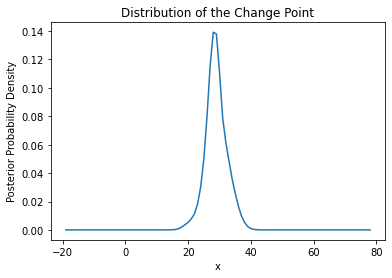

In [11]:
plt.plot(Reduced(x),Fit.prob_cp)
plt.xlabel("x")
plt.ylabel("Posterior Probability Density")
plt.title("Distribution of the Change Point")

In [12]:
# all in one function
def CP_Distribution(x,Y,n):
    y = np.sort(Y)
    
    
    CPFit = CPSegmentFit(x_data = x,
             y_data = y,
             number_expected_changepoints = n,
             num_MC_cp_samples = 1000000,
                   z_array_size = 100)
    
    CPFit.initialize_MC_cp_configurations(print_sum_control = True)
    CPFit.initialize_A_matrices()
    try:
        CPFit.Q_matrix_and_inverse_Q()
    except np.linalg.LinAlgError as err:
        if 'Singular matrix' in str(err):
            CPFit.initialize_MC_cp_configurations()
            CPFit.initialize_A_matrices()
            
    
    CPFit.calculate_f0()
    CPFit.calculate_residue()
    CPFit.calculate_marginal_likelihood()
    CPFit.calculate_marginal_cp_pdf()
    CPFit.calculate_prob_cp()
    
    return(CPFit.prob_cp)

In [13]:
CP_distr = CP_Distribution(x,y,1)


number of MC cp samples before exact correction:  1000000
number of MC cp samples:  98
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[-19]
 [-18]
 [-17]
 [-16]
 [-15]
 [-14]
 [-13]
 [-12]
 [-11]
 [-10]
 [ -9]
 [ -8]
 [ -7]
 [ -6]
 [ -5]
 [ -4]
 [ -3]
 [ -2]
 [ -1]
 [  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]]
Possible configs shape:  (98, 1)
composition_dummy:  [[-20. -19.  79.]
 [-20. -18.  79.]
 [-20. -17.  79.]
 [-20. -16.  79.]
 [-20. -15.  79.]


Text(0.5, 1.0, 'Distribution of the Change Point')

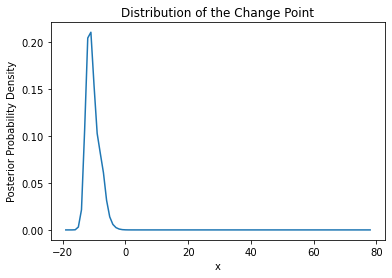

In [14]:
plt.plot(Reduced(x),CP_distr)
plt.xlabel("x")
plt.ylabel("Posterior Probability Density")
plt.title("Distribution of the Change Point")

### Now with the elbow data

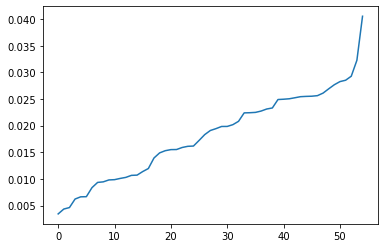

In [15]:
XDat = np.load("XAI_3.npy")
XDat_sort = np.sort(XDat)
XAI_x = np.arange(len(XDat_sort))

plt.plot(XAI_x,
         XDat_sort)

number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27. 54.]
 [ 0. 28. 54.]
 [ 0. 29. 54.]
 [ 0. 30. 54.]
 [ 0. 31

Text(0.5, 1.0, 'Distribution of the Change Point')

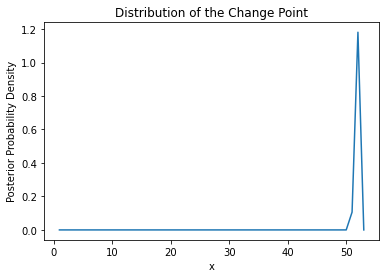

In [16]:
CP_XAI = CP_Distribution(XAI_x,XDat_sort,1)

plt.plot(Reduced(XAI_x),CP_XAI)
plt.xlabel("x")
plt.ylabel("Posterior Probability Density")
plt.title("Distribution of the Change Point")

### And with less obvious elbow data

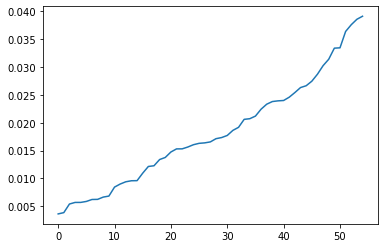

In [17]:
XDat = np.load("XAI_2.npy")
XDat_sort = np.sort(XDat)
XAI_x = np.arange(len(XDat_sort))

plt.plot(XAI_x,
         XDat_sort)


number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27. 54.]
 [ 0. 28. 54.]
 [ 0. 29. 54.]
 [ 0. 30. 54.]
 [ 0. 31

Text(0.5, 1.0, 'Distribution of the Change Point')

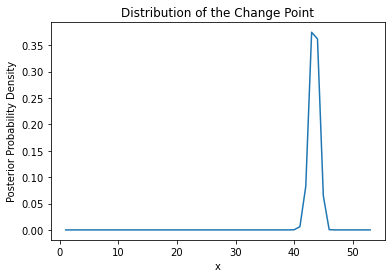

In [18]:
CP_XAI = CP_Distribution(XAI_x,XDat_sort,1)

plt.plot(Reduced(XAI_x),CP_XAI)
plt.xlabel("x")
plt.ylabel("Posterior Probability Density")
plt.title("Distribution of the Change Point")

In [19]:
print(CP_XAI)
print(np.argmax(CP_XAI))

[1.38106576e-24 2.20245409e-24 4.15029953e-24 7.95255766e-24
 1.44659488e-23 2.47083398e-23 3.83851703e-23 5.37886864e-23
 6.77505487e-23 8.32661615e-23 1.07276899e-22 1.42939324e-22
 1.90890224e-22 2.43901513e-22 3.06787009e-22 4.11158097e-22
 5.89410850e-22 9.20698771e-22 1.59679995e-21 3.18359103e-21
 7.59271150e-21 2.12982952e-20 6.96171330e-20 2.68537881e-19
 1.21894853e-18 6.25968812e-18 3.45020095e-17 2.03919323e-16
 1.20651286e-15 6.62183527e-15 3.48916988e-14 1.71915524e-13
 9.87810475e-13 6.10849887e-12 3.72350165e-11 2.87452563e-10
 3.77072020e-09 9.88769045e-08 4.50157491e-06 2.07155275e-04
 6.16459887e-03 8.24916480e-02 3.74695297e-01 3.62142374e-01
 6.44900735e-02 5.13766102e-04 5.67958248e-07 4.37580954e-10
 3.14050303e-13 6.76326877e-16 6.73642003e-19 2.46153536e-21
 0.00000000e+00]
42


## More selective Output

Make sure that the output of the function is 
1) The number of relevant terms
2) The index of the relevant terms

In [20]:
# all in one function
def CP_Distr(x,Y,n):
    y = np.sort(Y)
    
    
    CPFit = CPSegmentFit(x_data = x,
             y_data = y,
             number_expected_changepoints = n,
             num_MC_cp_samples = 1000000,
                   z_array_size = 100)
    
    CPFit.initialize_MC_cp_configurations(print_sum_control = True)
    CPFit.initialize_A_matrices()
    try:
        CPFit.Q_matrix_and_inverse_Q()
    except np.linalg.LinAlgError as err:
        if 'Singular matrix' in str(err):
            CPFit.initialize_MC_cp_configurations()
            CPFit.initialize_A_matrices()
            
    
    CPFit.calculate_f0()
    CPFit.calculate_residue()
    CPFit.calculate_marginal_likelihood()
    CPFit.calculate_marginal_cp_pdf()
    CPFit.calculate_prob_cp()
    
    Probabilities = CPFit.prob_cp
    
    # where is the maximum for the CP Distribution?
    PositionMaximum = np.argmax(Probabilities)
    # note that Probabilities "lost" the first and last index of y
    
    CP_Value = y[PositionMaximum+1] # +1 because y[0] has been disregarded
    
    RelevantIndex = (Y> CP_Value)
    
    return([sum(Y>CP_Value), RelevantIndex])

In [21]:
CP_Distr(XAI_x,XDat,1)

number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27. 54.]
 [ 0. 28. 54.]
 [ 0. 29. 54.]
 [ 0. 30. 54.]
 [ 0. 31

[11,
 array([ True,  True,  True, False, False, False,  True, False,  True,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True, False,  True, False, False, False, False,  True, False,
        False, False, False, False, False, False, False,  True,  True,
        False])]

In [22]:
print(CP_XAI)
print(XDat > np.sort(XDat)[np.argmax(CP_XAI+1)])

[1.38106576e-24 2.20245409e-24 4.15029953e-24 7.95255766e-24
 1.44659488e-23 2.47083398e-23 3.83851703e-23 5.37886864e-23
 6.77505487e-23 8.32661615e-23 1.07276899e-22 1.42939324e-22
 1.90890224e-22 2.43901513e-22 3.06787009e-22 4.11158097e-22
 5.89410850e-22 9.20698771e-22 1.59679995e-21 3.18359103e-21
 7.59271150e-21 2.12982952e-20 6.96171330e-20 2.68537881e-19
 1.21894853e-18 6.25968812e-18 3.45020095e-17 2.03919323e-16
 1.20651286e-15 6.62183527e-15 3.48916988e-14 1.71915524e-13
 9.87810475e-13 6.10849887e-12 3.72350165e-11 2.87452563e-10
 3.77072020e-09 9.88769045e-08 4.50157491e-06 2.07155275e-04
 6.16459887e-03 8.24916480e-02 3.74695297e-01 3.62142374e-01
 6.44900735e-02 5.13766102e-04 5.67958248e-07 4.37580954e-10
 3.14050303e-13 6.76326877e-16 6.73642003e-19 2.46153536e-21
 0.00000000e+00]
[ True  True  True False False False  True False  True False False False
  True  True False False False False False False False False False False
 False False False False False False False F

In [23]:
CP_XAI.shape, XDat.shape

((53,), (55,))

In [24]:
XDat[np.argmax(XDat)]

0.039082244870960764

## Now with the full XAI data set

In [25]:
XAI = np.load("XAI_Finance.npy")
Names = np.load("Names.npy")
LabelNaiveOrdered = np.load("LabelNaiveOrdered.npy")
XAI.shape, Names

((5251, 55),
 array(['E', 'CD', 'F', 'I', 'U', 'CS', 'RE', 'Com', 'M', 'IT', 'HC'],
       dtype='<U3'))

In [26]:
Names = list(Names)

# E: Energy, CD: Constumer Discretionary, F: Financials, I: Industrials, U: Utilities, CS: Constumer Staples,
# RE: Real Estate, Com: Communication Services, M: Materials, IT: Information Technology, HC: Health Care

In [27]:
def plot_matrix(m, title='Correlation Matrix', cmap=plt.cm.Blues, labels= None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(m)
    plt.title(title,y=1.08)
    fig.colorbar(cax)
    
    
    xaxis = np.arange(len(labels))
    ax.set_xticks(xaxis)
    ax.set_yticks(xaxis)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    
    #ax.set_xticklabels([''] + labels)
    #ax.set_yticklabels([''] + labels)
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.xlabel('Sectors')
    plt.ylabel('Sectors')
    plt.show()
   

In [28]:
# Transform back to original sectors

def ReverseDiag(Array, ZERO = False):
    N = np.sqrt(2*len(Array)+0.25)+0.5
    N = int(N)
    Original = np.ones(int(N**2.)).reshape(1,-1)
    
    if ZERO:
        Original = np.zeros(int(N**2.)).reshape(1,-1)
    
    index = np.triu(np.ones((N,N)),1)
    index = index.reshape(1,-1)
    index = index.astype(bool)
    
    Original[index] = Array # upper triangle
    Original = Original.reshape((N,N))
    Original = Original.T  # guarantee symmetry
    Original=Original.reshape(1,-1)
    Original[index] = Array
    Original=Original.reshape((N,N))

    return(Original)

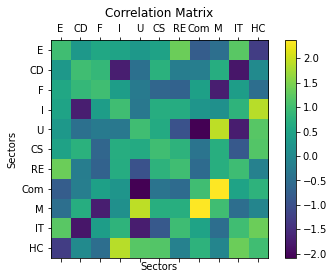

In [29]:
plot_matrix(ReverseDiag(np.random.normal(0,1,55)),
           labels = Names)

In [30]:
def PrintNames(Mat, Names):
    Out = list()
    for i in range(Mat.shape[0]):
        for j in range(i+1, Mat.shape[1]):
            if Mat[i,j]==1:
                Out.append(Names[i]+"/"+Names[j])
    return(Out)

number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27. 54.]
 [ 0. 28. 54.]
 [ 0. 29. 54.]
 [ 0. 30. 54.]
 [ 0. 31

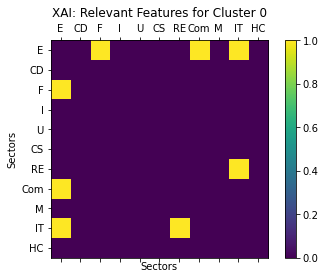

Relevant Correlations: ['E/F', 'E/Com', 'E/IT', 'RE/IT']
 # # # # 
number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 

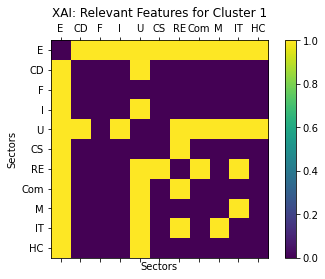

Relevant Correlations: ['E/CD', 'E/F', 'E/I', 'E/U', 'E/CS', 'E/RE', 'E/Com', 'E/M', 'E/IT', 'E/HC', 'CD/U', 'I/U', 'U/RE', 'U/Com', 'U/M', 'U/IT', 'U/HC', 'CS/RE', 'RE/Com', 'RE/IT', 'M/IT']
 # # # # 
number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 

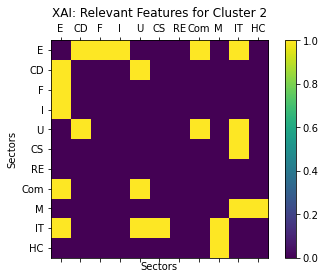

Relevant Correlations: ['E/CD', 'E/F', 'E/I', 'E/Com', 'E/IT', 'CD/U', 'U/Com', 'U/IT', 'CS/IT', 'M/IT', 'M/HC']
 # # # # 
number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0.

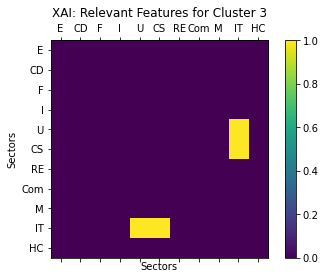

Relevant Correlations: ['U/IT', 'CS/IT']
 # # # # 
number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27. 54.]
 [

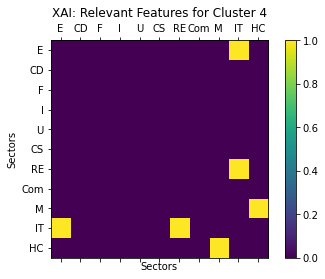

Relevant Correlations: ['E/IT', 'RE/IT', 'M/HC']
 # # # # 
number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27.

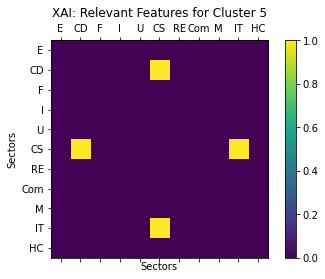

Relevant Correlations: ['CD/CS', 'CS/IT']
 # # # # 
number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27. 54.]
 

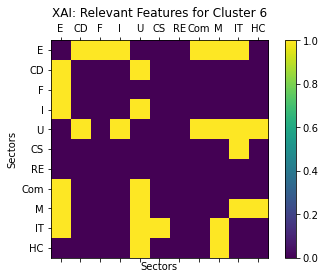

Relevant Correlations: ['E/CD', 'E/F', 'E/I', 'E/Com', 'E/M', 'E/IT', 'CD/U', 'I/U', 'U/Com', 'U/M', 'U/IT', 'U/HC', 'CS/IT', 'M/IT', 'M/HC']
 # # # # 
number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 

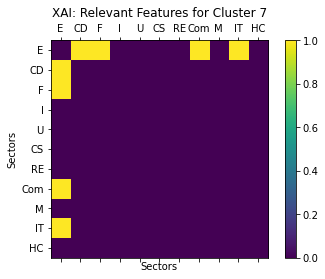

Relevant Correlations: ['E/CD', 'E/F', 'E/Com', 'E/IT']
 # # # # 


In [31]:
# and plots for each Cluster
for j in range(int(max(LabelNaiveOrdered)+1)):
    #DetectElbow(XAI[LabelNaiveOrdered==j,:].mean(0), 0, 50, 100, True)
    DE = CP_Distr(np.arange(XAI.shape[1]),
                  XAI[LabelNaiveOrdered==j,:].mean(0),
                  1)
    print(j, DE[0], DE[1] )
    
    relIndex = np.zeros(55)
    relIndex[DE[1]] = 1.
    RelMat = ReverseDiag(relIndex,
                       ZERO = True)
    plot_matrix(RelMat,
            title = "XAI: Relevant Features for Cluster "+str(j),
           labels = Names)
    print("Relevant Correlations:",PrintNames(RelMat, Names))
    
    print(" # # # # ")